In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import mixture

In [5]:
data = 'data/heart.csv'
df = pd.read_csv(data)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


KeyboardInterrupt: 

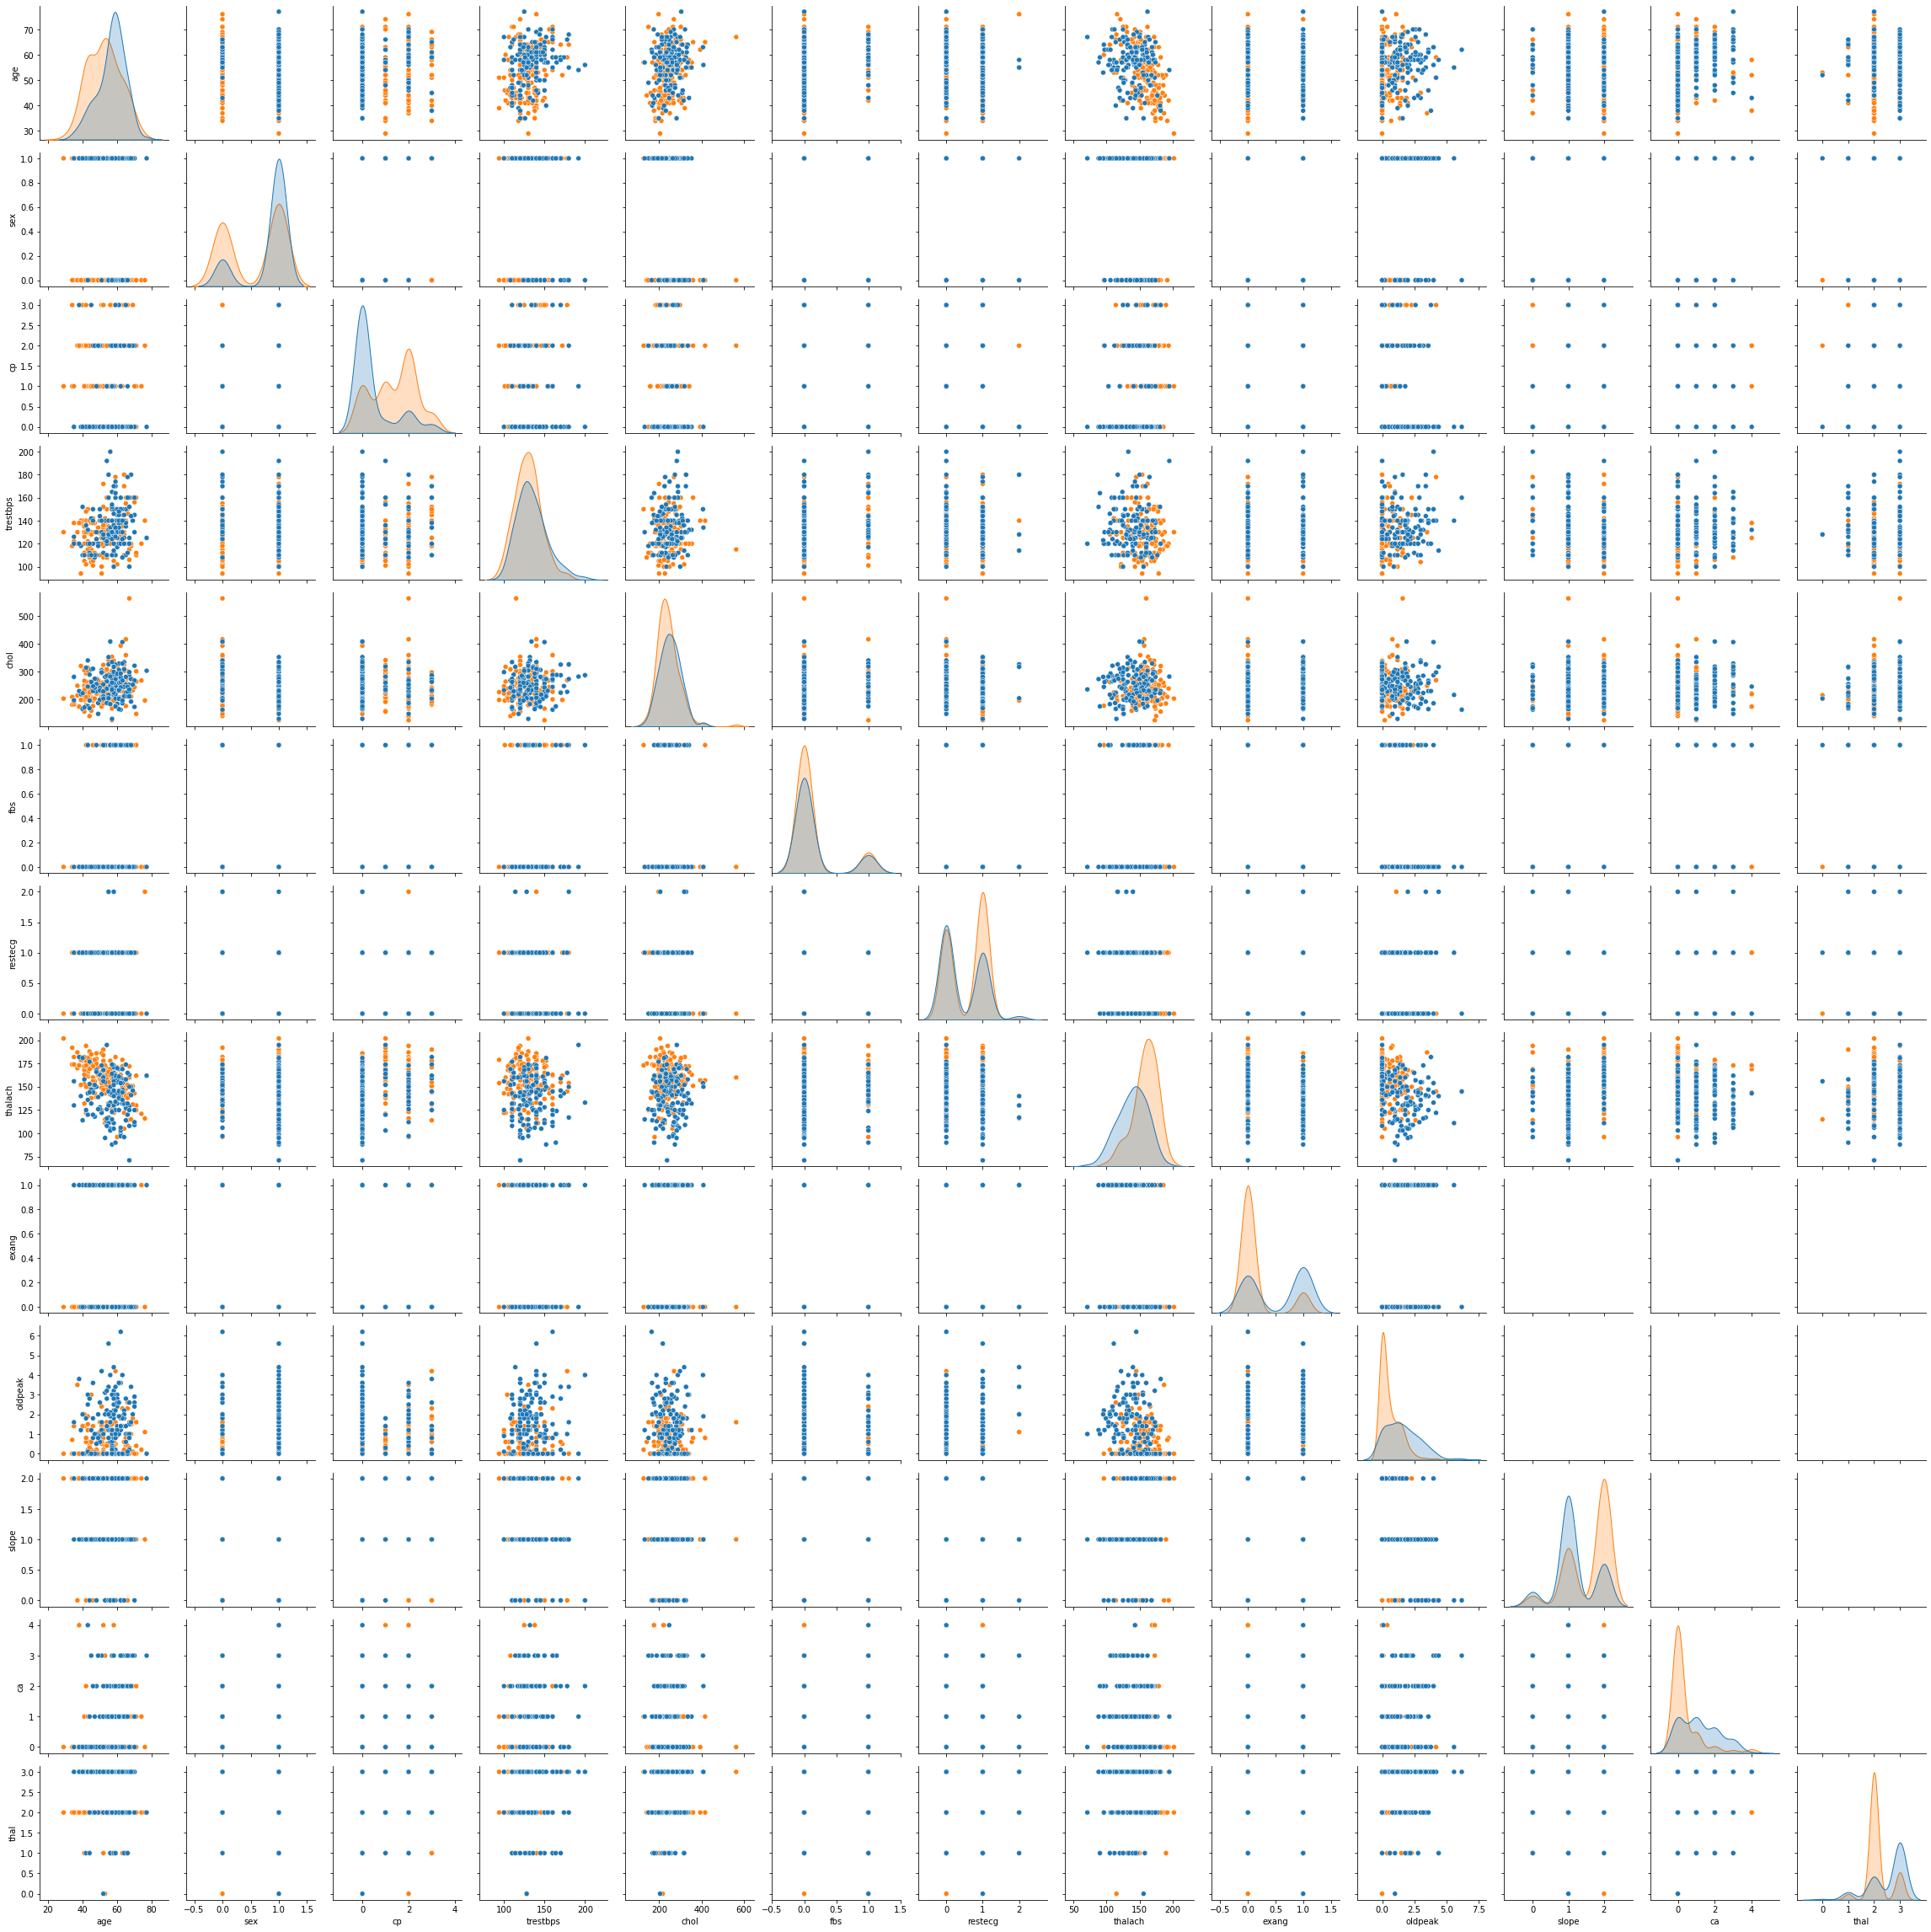

In [6]:
sns.pairplot(df, hue = 'target')
plt.show()

In [7]:
scaler = MinMaxScaler()
df[['age', 'sex', 'cp', 'trestbps', 'chol','fbs', 'restecg','thalach', 'exang', 'oldpeak', 'slope','ca','thal']] = scaler.fit_transform(df[['age', 'sex', 'cp', 'trestbps', 'chol','fbs', 'restecg','thalach', 'exang', 'oldpeak', 'slope','ca','thal']])

In [8]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333,1
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667,1
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,1
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667,1
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000,0
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000,0
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000,0
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000,0


In [9]:
y = df['target']
X = df.drop(['target'], axis = 1)

In [10]:
model = LDA(n_components = 1)

In [11]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [12]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [13]:
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.830 (0.075)


In [14]:
data = model.fit_transform(X,y)

In [15]:
data

array([[-8.80047643e-01],
       [-4.27806606e-01],
       [-1.55946382e+00],
       [-1.17309238e+00],
       [-6.25089461e-01],
       [-5.13074962e-01],
       [-7.80452410e-01],
       [-8.25422079e-01],
       [-7.45330802e-01],
       [-1.24152620e+00],
       [-2.52681208e-01],
       [-1.97045716e+00],
       [-1.03631399e+00],
       [-4.25219445e-01],
       [-2.17788850e+00],
       [-1.70672195e+00],
       [-2.37145891e+00],
       [-7.72536698e-01],
       [-2.60141298e-01],
       [-1.28660734e+00],
       [ 3.32978943e-01],
       [-1.11777384e+00],
       [-8.10742643e-01],
       [ 7.64615655e-03],
       [-8.26391980e-01],
       [-5.91217757e-01],
       [-1.03665587e+00],
       [-1.18901542e+00],
       [-1.17718967e+00],
       [-4.38516674e-01],
       [-1.84530471e+00],
       [ 6.64531915e-02],
       [-1.26650002e+00],
       [-5.97950294e-02],
       [-1.23304712e-01],
       [-5.82282083e-01],
       [-2.36136409e+00],
       [-3.75503484e-01],
       [-1.6

In [16]:
labels = model.predict(X)

In [17]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,

In [22]:
dataset_df = pd.DataFrame(data)

In [24]:
dataset_df['LDA'] = pd.DataFrame(data)
dataset_df

,0,LDA
0,-0.880048,-0.880048
1,-0.427807,-0.427807
2,-1.559464,-1.559464
3,-1.173092,-1.173092
4,-0.625089,-0.625089
...,...,...
298,0.557016,0.557016
299,-0.708570,-0.708570
300,2.037225,2.037225
301,1.841642,1.841642


In [25]:
dataset_df = dataset_df.drop(dataset_df.columns[[0]], axis=1)

In [26]:
dataset_df

,LDA
0,-0.880048
1,-0.427807
2,-1.559464
3,-1.173092
4,-0.625089
...,...
298,0.557016
299,-0.708570
300,2.037225
301,1.841642


C:\Users\707609\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


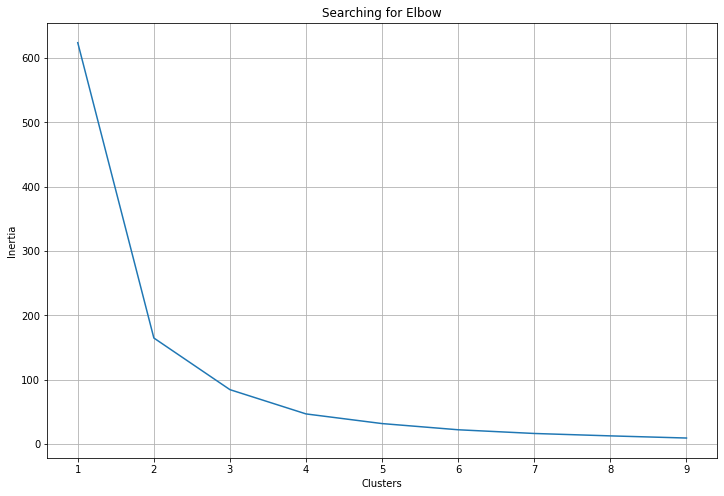

In [27]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 10):
    km = KMeans(n_clusters=i).fit(dataset_df)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow


plt.grid()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6472853196022028
For n_clusters = 3 The average silhouette_score is : 0.5653460554956852
For n_clusters = 4 The average silhouette_score is : 0.5717569138933457
For n_clusters = 5 The average silhouette_score is : 0.5485695749274883


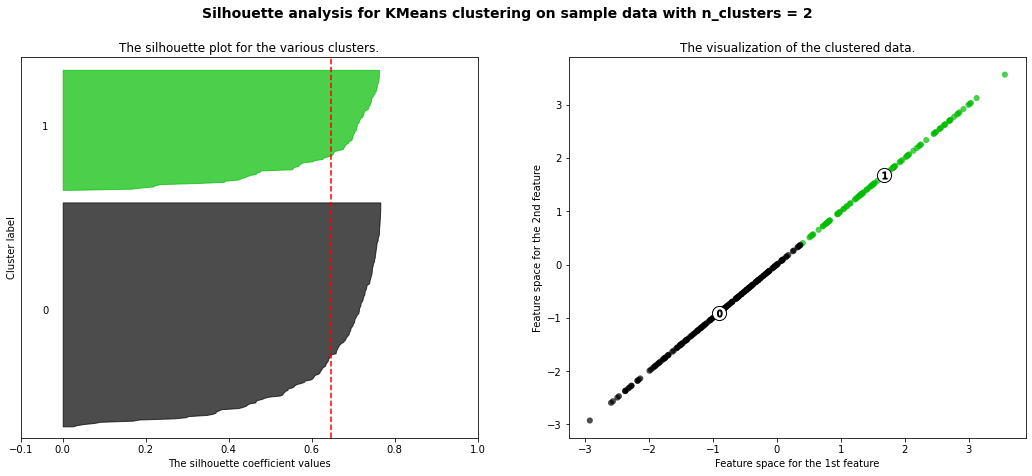

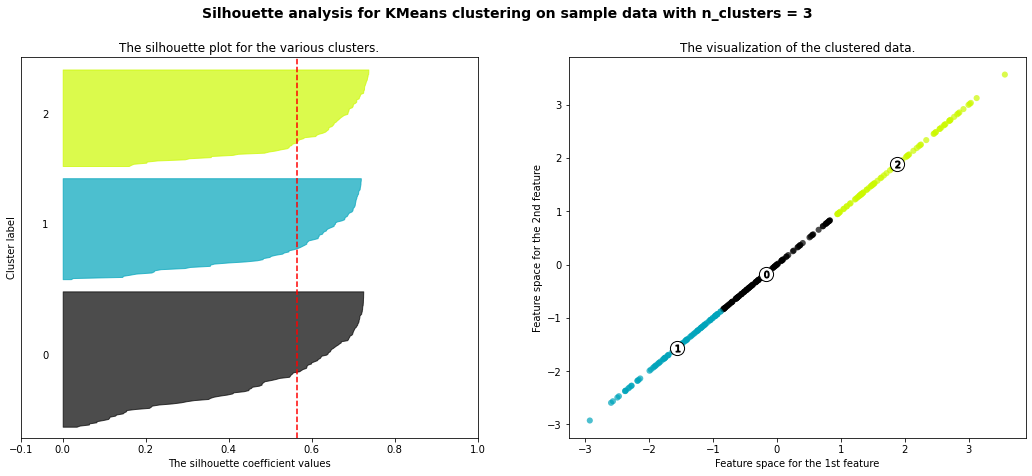

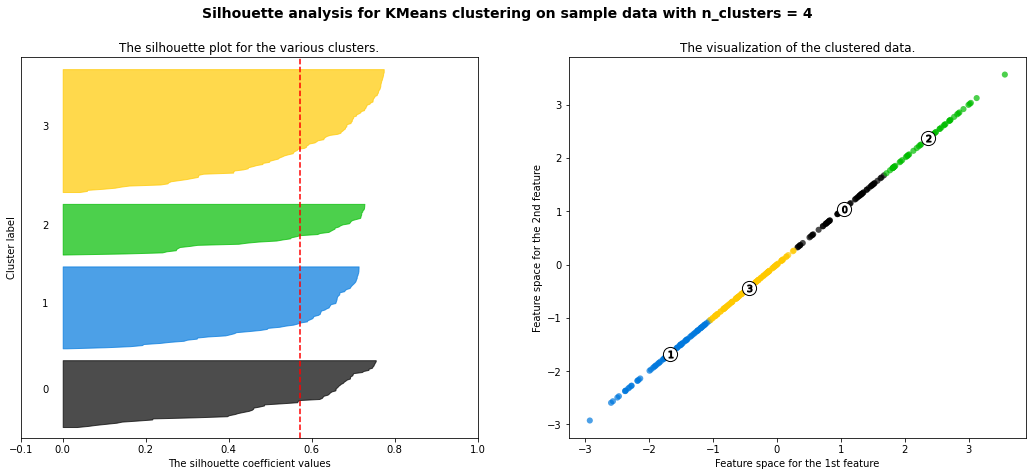

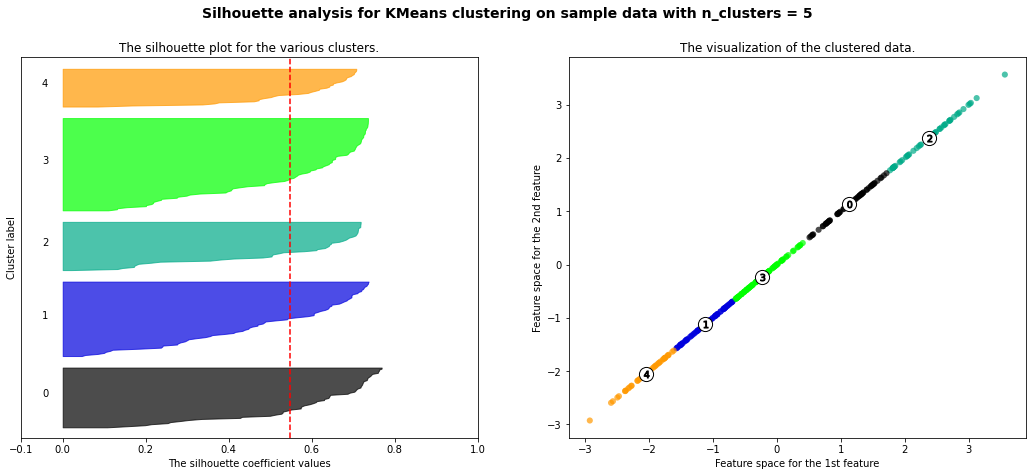

In [68]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.


range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dataset_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(dataset_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dataset_df, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dataset_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        dataset_df['LDA'], dataset_df['LDA'], marker=".", s=150, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 0],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[0], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [28]:
km = KMeans(n_clusters= 2, random_state=10, max_iter = 600, tol = 1)

In [29]:
model = km.fit(dataset_df)

In [30]:
cluster_labels = model.labels_
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,

In [31]:
dataset_df['labels'] = cluster_labels
dataset_df

,LDA,labels
0,-0.880048,0
1,-0.427807,0
2,-1.559464,0
3,-1.173092,0
4,-0.625089,0
...,...,...
298,0.557016,1
299,-0.708570,0
300,2.037225,1
301,1.841642,1


In [74]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from keras import datasets
from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History
from keras import backend as K
from keras import losses
from sklearn.utils import shuffle

In [75]:
y = dataset_df['labels']
X = dataset_df.drop(columns=['labels'])

print(X.shape)
print(y.shape)

(303, 1)
(303,)


In [76]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, stratify=y, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(212, 1)
(91, 1)


In [77]:
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(8, input_dim=x_train.shape[1], activation='relu', kernel_initializer='uniform', kernel_constraint=maxnorm(2)))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu', kernel_initializer='uniform', kernel_constraint=maxnorm(2)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [78]:
model_tuned = model.fit(x_train, y_train,
                    batch_size=10,
                    epochs=100,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/100
17/17 [==============================] - 1s 11ms/step - loss: 0.6878 - accuracy: 0.8757 - val_loss: 0.6831 - val_accuracy: 0.9535
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6787 - accuracy: 0.9586 - val_loss: 0.6725 - val_accuracy: 0.9767
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6640 - accuracy: 0.9704 - val_loss: 0.6568 - val_accuracy: 1.0000
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6475 - accuracy: 0.9704 - val_loss: 0.6358 - val_accuracy: 0.9302
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6209 - accuracy: 0.9586 - val_loss: 0.6085 - val_accuracy: 0.9302
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5851 - accuracy: 0.9467 - val_loss: 0.5752 - val_accuracy: 0.9302
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5507 - accuracy: 0.9822 - val_loss: 0.5373 - val_accuracy: 0.9302
Epoch 8/100


In [79]:
score = model.evaluate(x_test, y_test, verbose=0)
score

[0.022609395906329155, 0.9890109896659851]

In [80]:
print('Test accuracy:', score[1])
print('Test loss:', score[0])

Test accuracy: 0.9890109896659851
Test loss: 0.022609395906329155


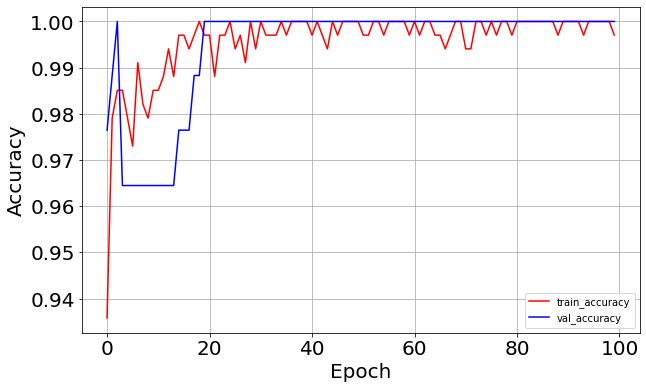

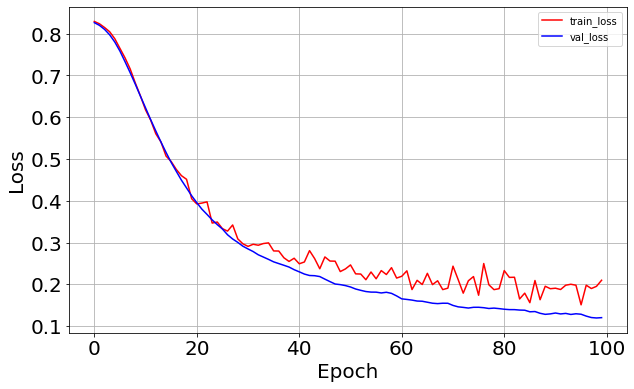

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_tuned.history['accuracy']), 'r', label='train_accuracy')
ax.plot(np.sqrt(model_tuned.history['val_accuracy']), 'b' ,label='val_accuracy')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
plt.grid()
ax.tick_params(labelsize=20)

fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_tuned.history['loss']), 'r', label='train_loss')
ax.plot(np.sqrt(model_tuned.history['val_loss']), 'b' ,label='val_loss')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
plt.grid()
ax.tick_params(labelsize=20)

In [83]:
dataset_df = dataset_df.drop(['labels'], axis = 1)
dataset_df

,LDA
0,-0.880048
1,-0.427807
2,-1.559464
3,-1.173092
4,-0.625089
...,...
298,0.557016
299,-0.708570
300,2.037225
301,1.841642


For n_components = 2 The average silhouette_score is : 0.6848634141372051
For n_components = 3 The average silhouette_score is : 0.6061435092488655
For n_components = 4 The average silhouette_score is : 0.5979550824260431
For n_components = 5 The average silhouette_score is : 0.5850490252301083


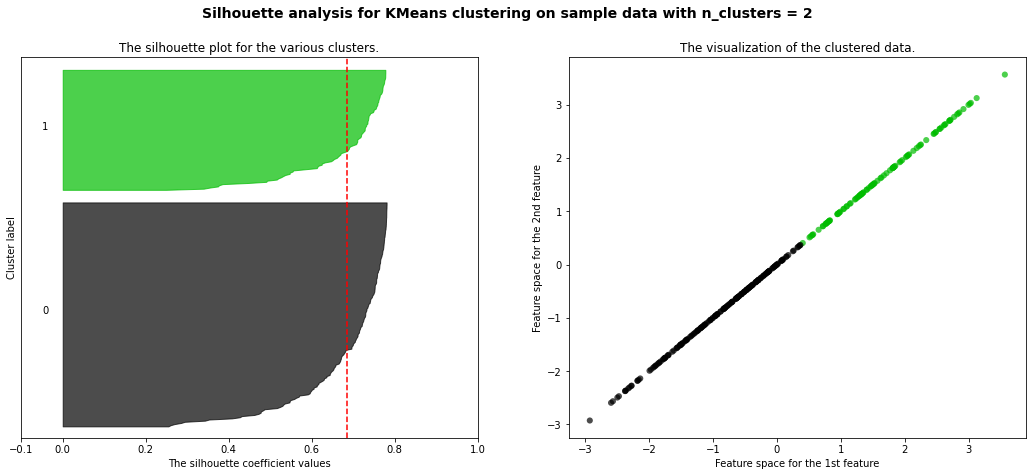

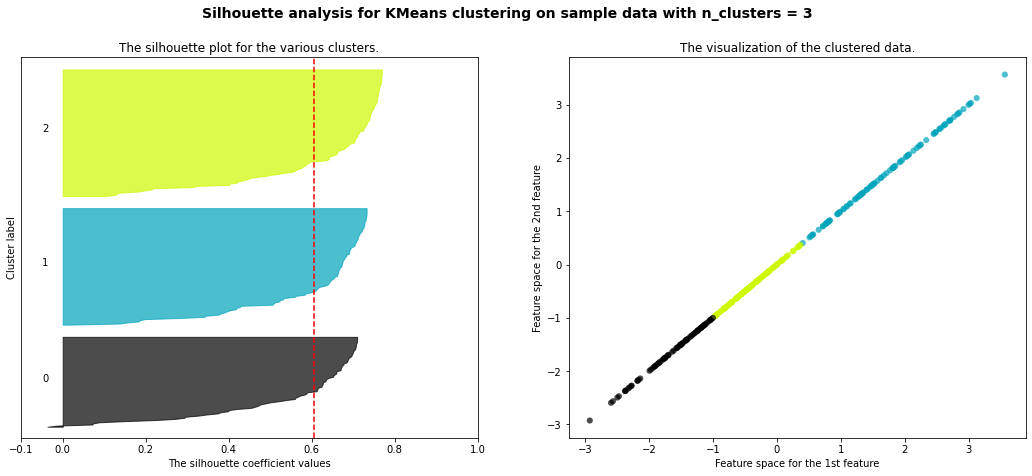

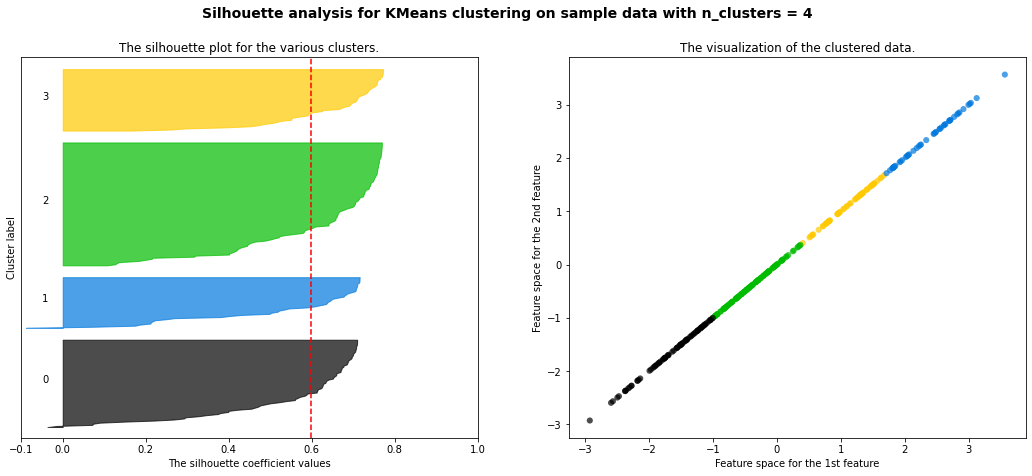

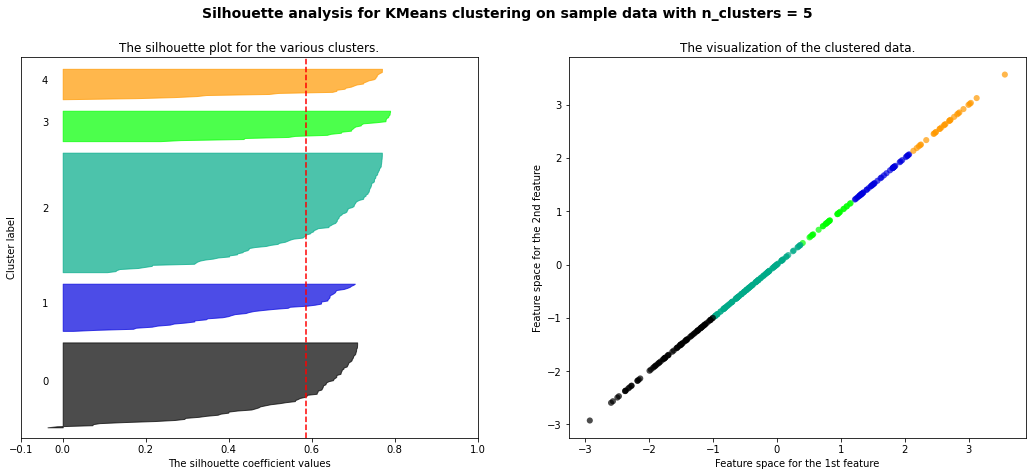

In [33]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


range_n_components = [2, 3, 4, 5]

for n_components in range_n_components:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dataset_df) + (n_components + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    gmm = mixture.GaussianMixture(
    n_components=n_components, covariance_type='spherical', max_iter = 600, tol = 0.01, random_state = 4
        )
    cluster_labels = gmm.fit_predict(dataset_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dataset_df, cluster_labels)
    print(
        "For n_components =",
        n_components,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dataset_df, cluster_labels)

    y_lower = 10
    for i in range(n_components):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_components)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_components)
    ax2.scatter(
        dataset_df['LDA'], dataset_df['LDA'], marker=".", s=150, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )



    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_components,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [87]:
    gmm = mixture.GaussianMixture(
        n_components=2, covariance_type='spherical', max_iter = 600, tol = 0.01, random_state = 4
            )

In [88]:
model = gmm.fit(dataset_df)

In [90]:
labels = gmm.predict(X)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,

In [91]:
dataset_df['labels'] = labels
dataset_df

,LDA,labels
0,-0.880048,0
1,-0.427807,0
2,-1.559464,0
3,-1.173092,0
4,-0.625089,0
...,...,...
298,0.557016,1
299,-0.708570,0
300,2.037225,1
301,1.841642,1


In [92]:
y = dataset_df['labels']
X = dataset_df.drop(columns=['labels'])

print(X.shape)
print(y.shape)

(303, 1)
(303,)


In [93]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, stratify=y, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(212, 1)
(91, 1)


In [94]:
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(8, input_dim=x_train.shape[1], activation='relu', kernel_initializer='uniform', kernel_constraint=maxnorm(2)))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu', kernel_initializer='uniform', kernel_constraint=maxnorm(2)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [95]:
model_tuned = model.fit(x_train, y_train,
                    batch_size=10,
                    epochs=100,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/100
17/17 [==============================] - 1s 9ms/step - loss: 0.6919 - accuracy: 0.6154 - val_loss: 0.6891 - val_accuracy: 0.7209
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.6450 - val_loss: 0.6855 - val_accuracy: 0.7209
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6856 - accuracy: 0.6450 - val_loss: 0.6812 - val_accuracy: 0.7209
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.6450 - val_loss: 0.6751 - val_accuracy: 0.7209
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6733 - accuracy: 0.6805 - val_loss: 0.6607 - val_accuracy: 0.7907
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6542 - accuracy: 0.8580 - val_loss: 0.6347 - val_accuracy: 0.9535
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6238 - accuracy: 0.9586 - val_loss: 0.5992 - val_accuracy: 1.0000
Epoch 8/100
1

In [96]:
score = model.evaluate(x_test, y_test, verbose=0)
score

[0.008967545814812183, 1.0]

In [97]:
print('Test accuracy:', score[1])
print('Test loss:', score[0])

Test accuracy: 1.0
Test loss: 0.008967545814812183


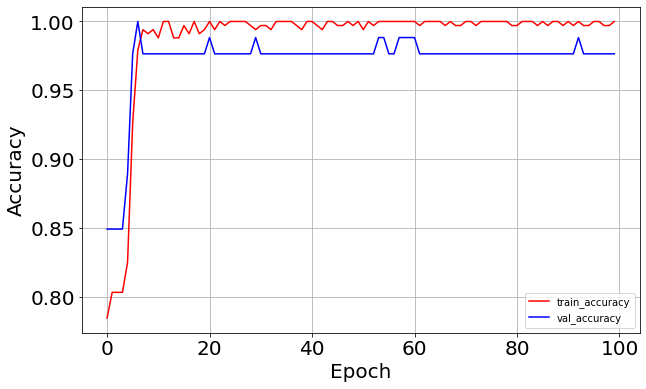

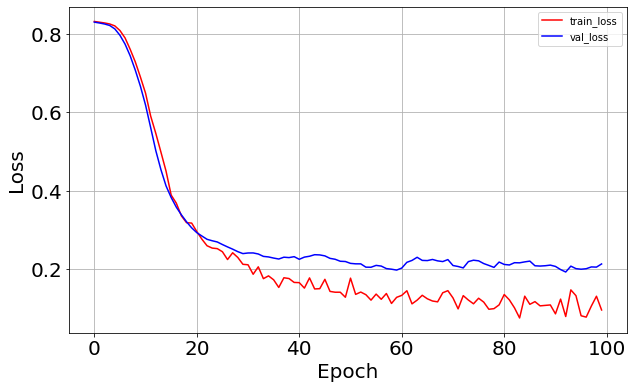

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_tuned.history['accuracy']), 'r', label='train_accuracy')
ax.plot(np.sqrt(model_tuned.history['val_accuracy']), 'b' ,label='val_accuracy')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
plt.grid()
ax.tick_params(labelsize=20)

fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_tuned.history['loss']), 'r', label='train_loss')
ax.plot(np.sqrt(model_tuned.history['val_loss']), 'b' ,label='val_loss')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
plt.grid()
ax.tick_params(labelsize=20)